In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Project
## Customer Churn Prediction ML Analysis 

In [98]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\Churn_Modelling.csv")

# Data Info

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [100]:
df.shape

(10000, 14)

In [101]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Handling & Cleaning

In [102]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [103]:
df.drop(columns=["Surname","CustomerId"],inplace=True)

In [104]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Eda & Visualization

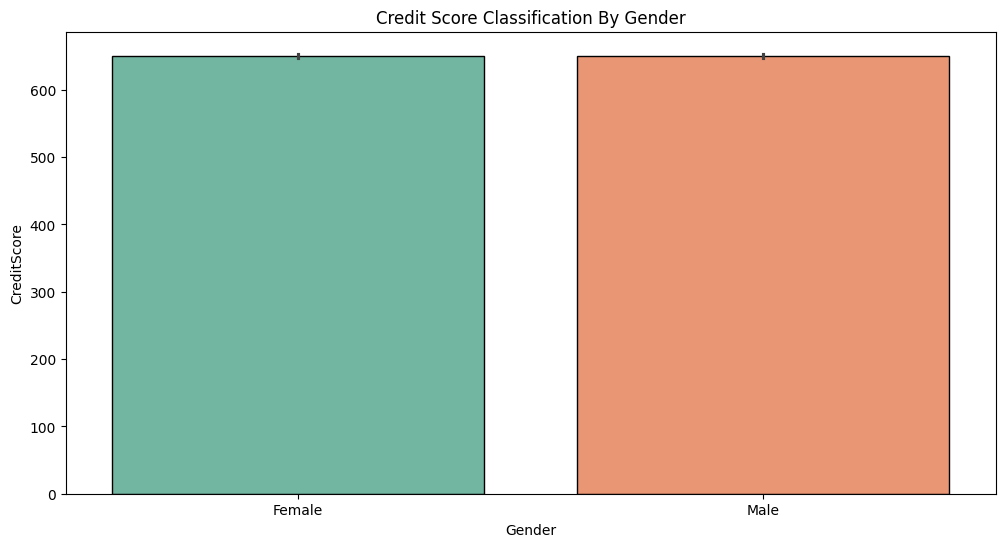

In [105]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x="Gender",y="CreditScore",palette="Set2",edgecolor="black")
plt.title("Credit Score Classification By Gender")
plt.show()

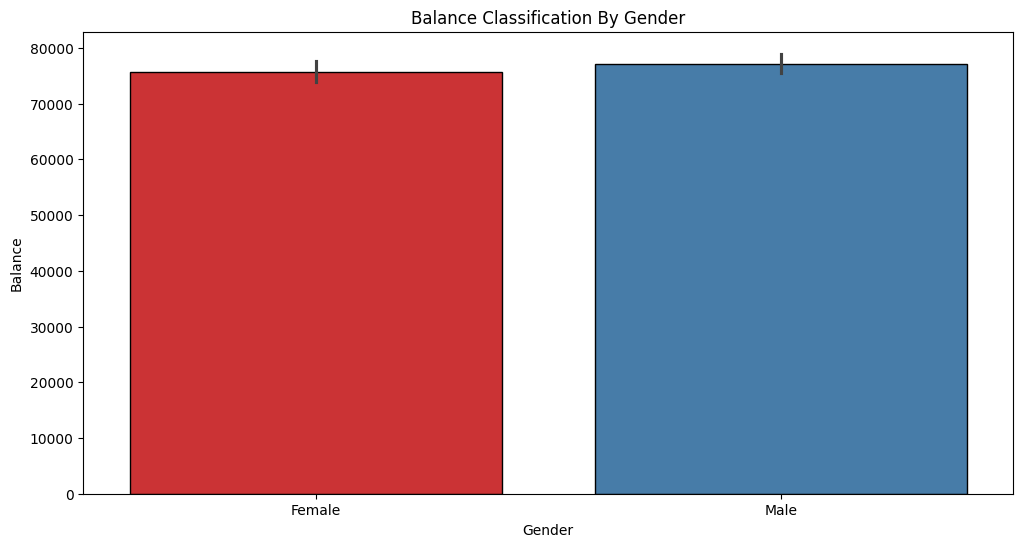

In [106]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x="Gender",y="Balance",palette="Set1",edgecolor="black")
plt.title("Balance Classification By Gender")
plt.show()

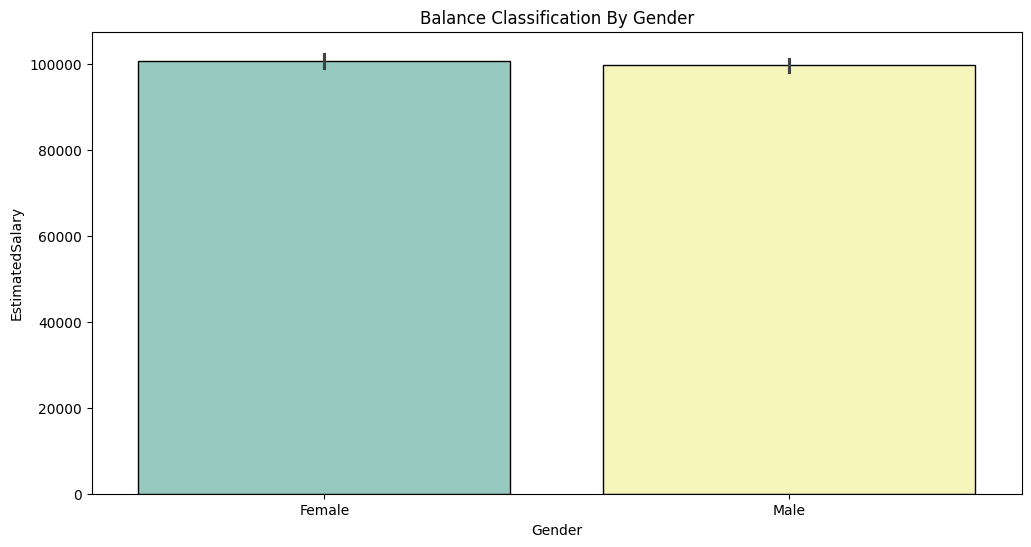

In [107]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x="Gender",y="EstimatedSalary",palette="Set3",edgecolor="black")
plt.title("Balance Classification By Gender")
plt.show()

<Axes: xlabel='Balance', ylabel='EstimatedSalary'>

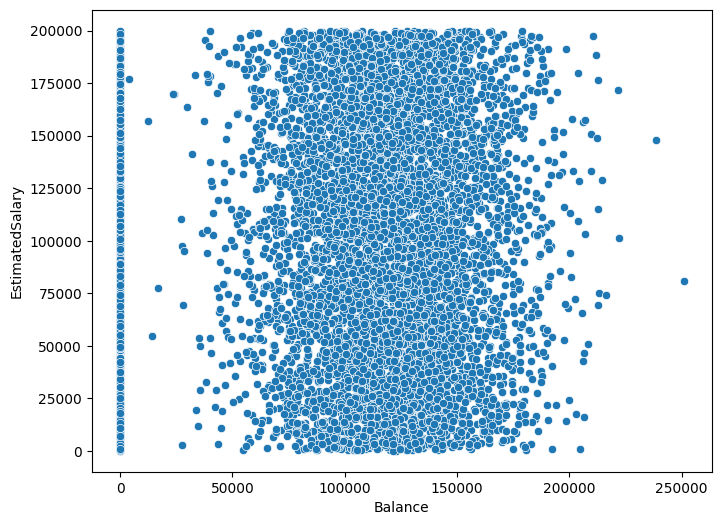

In [108]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x="Balance",y="EstimatedSalary")

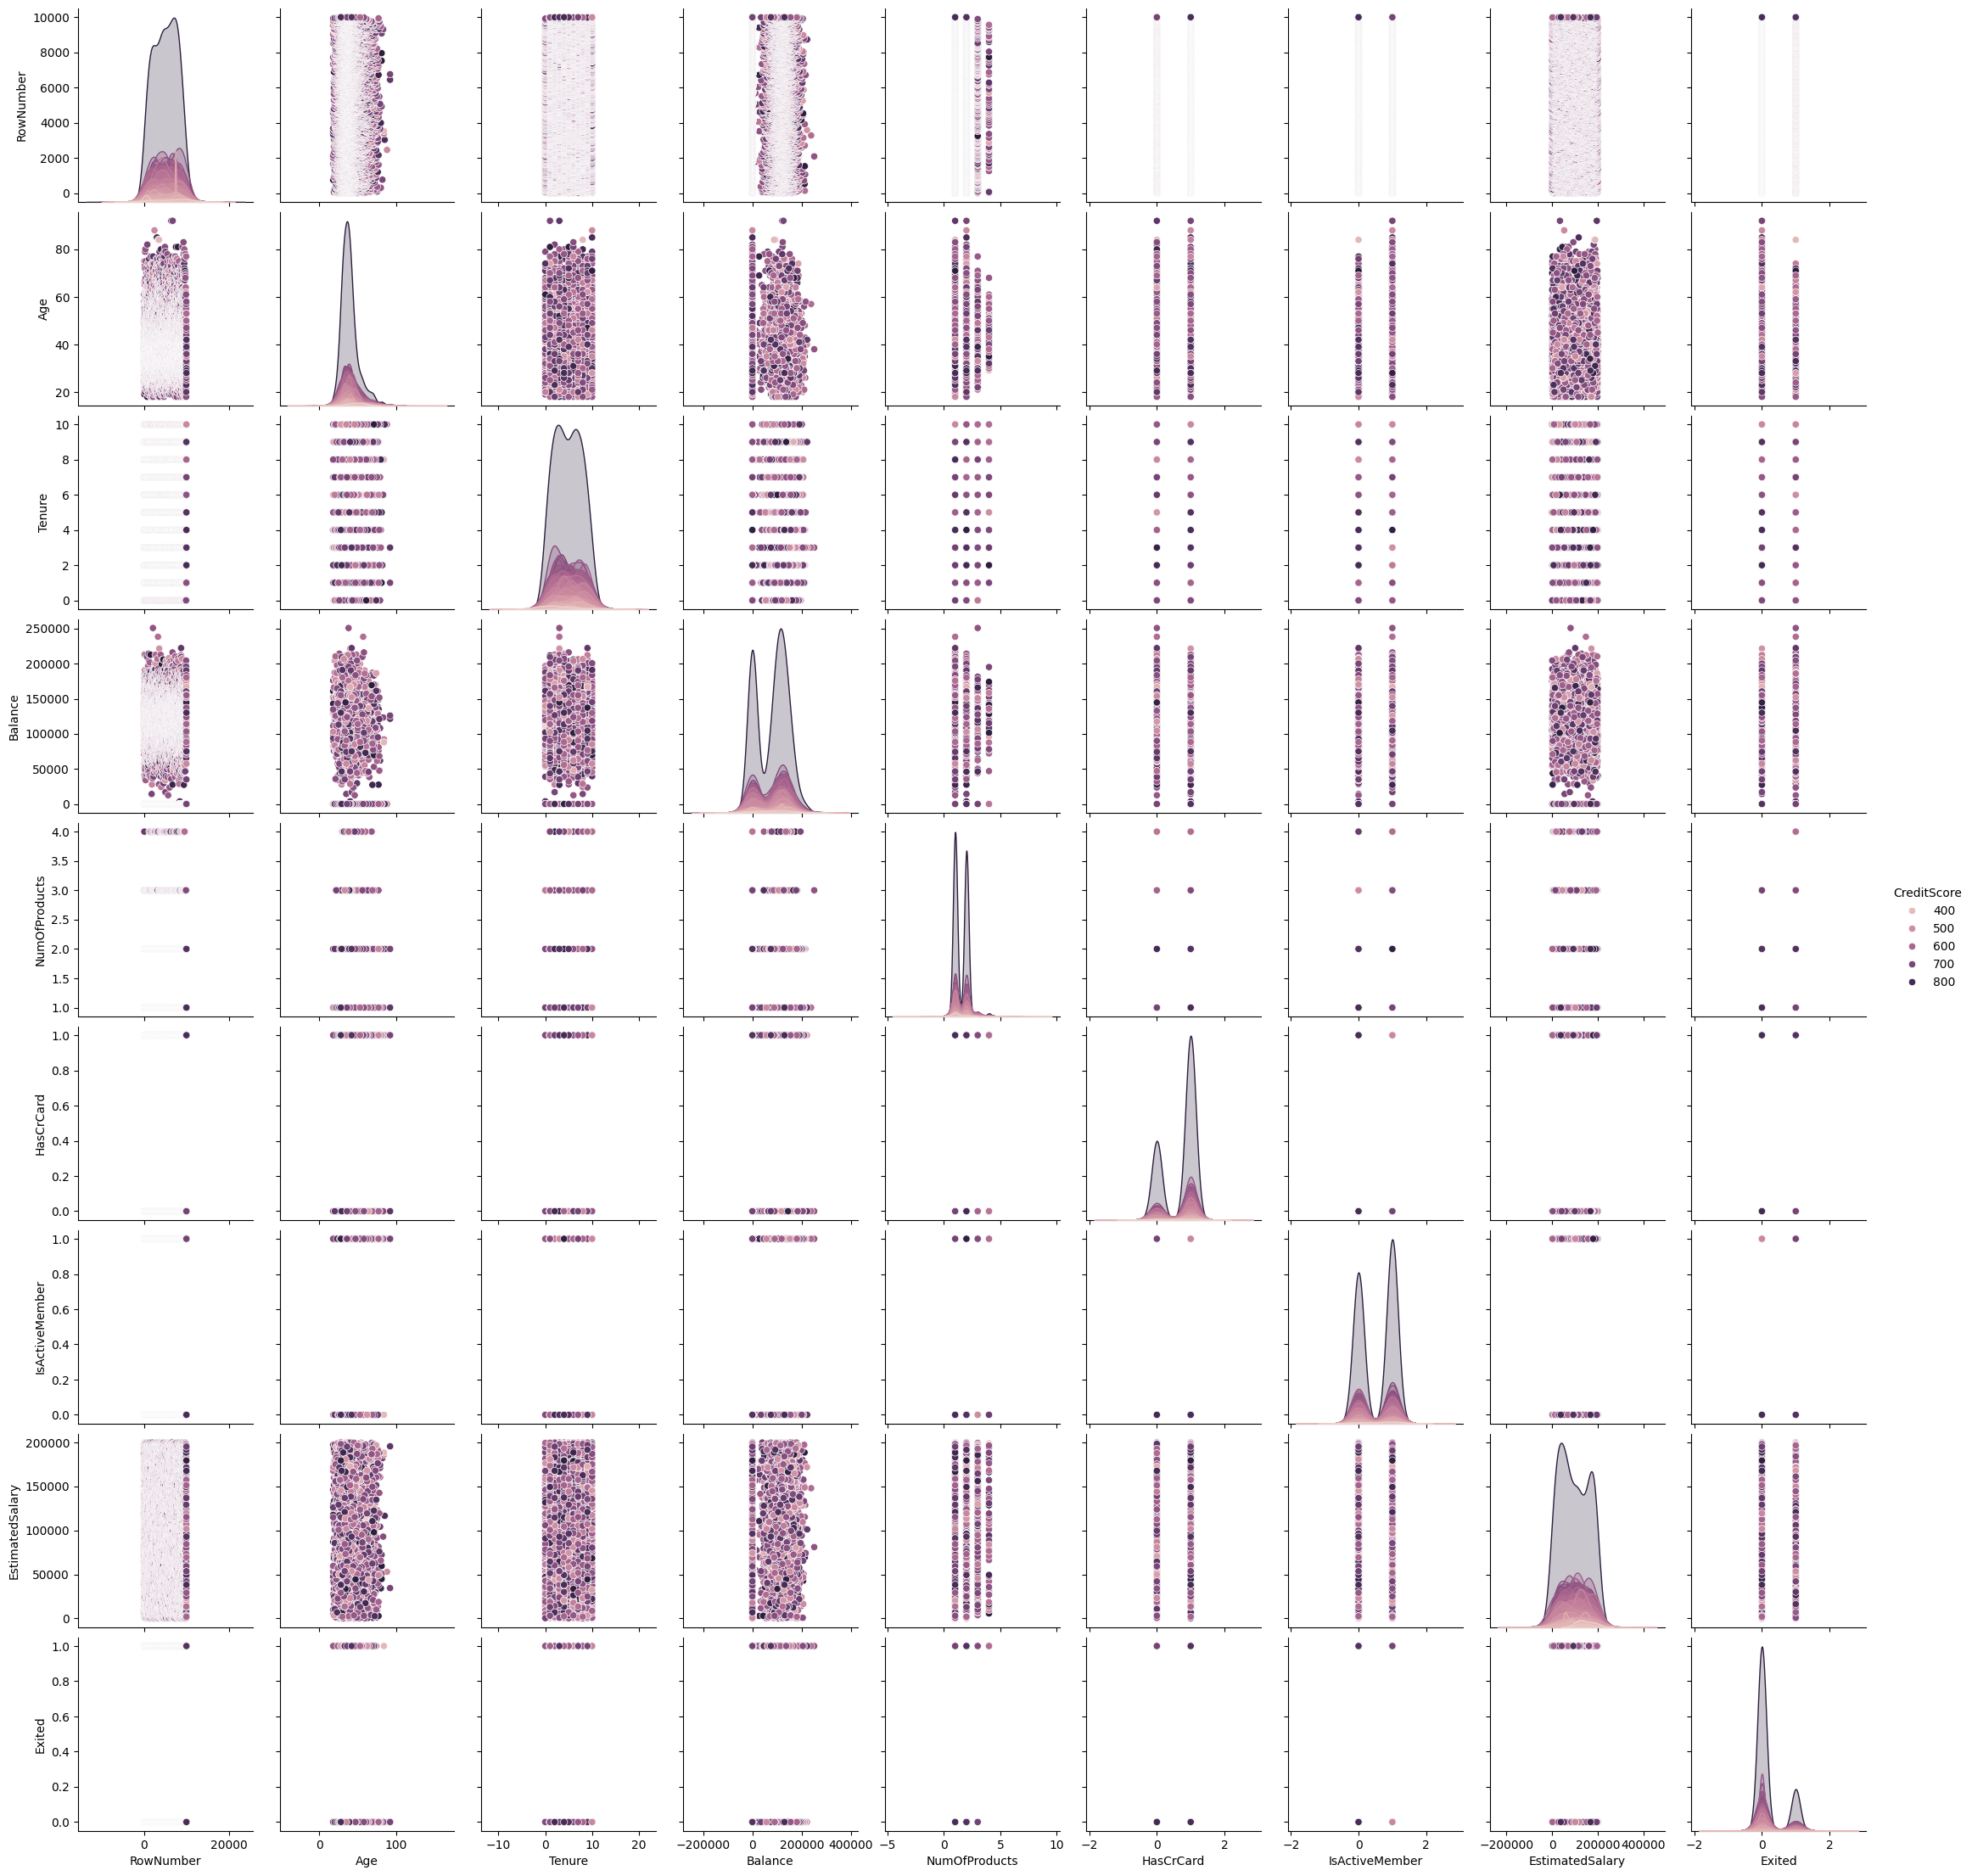

In [109]:
sns.pairplot(data=df,hue="CreditScore")

# Machine Learning

In [110]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [111]:
df.columns

Index(['RowNumber', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [112]:
cat_cols = df[['Geography', 'Gender']]
encoded_df = pd.get_dummies(cat_cols).astype(int)
df_encoded = pd.concat([df.drop(['Geography', 'Gender'], axis=1), encoded_df], axis=1)
df_encoded

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,9997,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,9998,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,9999,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [113]:
df_encoded.columns

Index(['RowNumber', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [114]:
x=df_encoded.drop(columns=["Exited"])
y=df_encoded["Exited"]

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.model_selection import train_test_split

In [117]:
y_pred=model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8105
Precision: 0.547945205479452
Recall: 0.2035623409669211
F1 Score: 0.29684601113172543
